The main aims of the Project :

* Common Crimes in Chicago
   1. A graph depicting the most occurring offences in Chicago from 2016 to 2020.

* Arrests and the City of Chicago
   1. What is the probability of an arrest ?
   2. Distribution of Arrests across the month
   3. How does arrest vary according to the type of crime ?

* Crime vs Time
   1. How does crime vary across the year ?
   2. Which hours are the most unsafe ?
   3. Is your house safe from a burglary during the day ?
   4. 24 hour pattern of a crime.

* Crime vs Locations
   1. Which district is the safest to live in? Which district is "Sin-district" ?
   2. Visualize most occurring crimes per district
   3. Concentration of Crime in the City

* Predicting
   1. Visualising the crime rate graph for 2021 and rest of the 2020 year
   2. Visualising the crime rate day-vise for 2021 and rest of the 2020 year  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [7]:
df=pd.read_csv('crimes.csv')

STUDYING THE DATASET

In [8]:
df.shape

(1206828, 22)

In [9]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10650787,HZ400580,08/20/2016 06:00:00 PM,064XX N GLENWOOD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,49.0,1,05,1165772.0,1942846.0,2016,09/06/2020 03:45:56 PM,41.998760,-87.665528,"(41.998760109, -87.665527862)"
1,10511493,HZ252767,05/03/2016 02:30:00 PM,052XX W LAKE ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,37.0,25,05,1141195.0,1902044.0,2016,09/05/2020 03:46:51 PM,41.887286,-87.756949,"(41.887285871, -87.756949272)"
2,10490637,HZ231540,04/18/2016 11:00:00 PM,003XX N MASON AVE,0313,ROBBERY,ARMED - OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,29.0,25,03,1136705.0,1901815.0,2016,09/05/2020 03:46:51 PM,41.886739,-87.773444,"(41.88673904, -87.773443614)"
3,12155816,JD355807,12/01/2016 05:00:00 PM,014XX W HOWARD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,49.0,1,02,NaN,NaN,2016,09/04/2020 03:47:35 PM,NaN,NaN,NaN
4,12154594,JD353646,09/01/2016 02:10:00 PM,020XX N TRIPP AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,35.0,20,11,NaN,NaN,2016,09/03/2020 03:49:17 PM,NaN,NaN,NaN


In [10]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.206828e+06,1.206828e+06,1.206827e+06,1.206801e+06,1.206828e+06,1.194094e+06,1.194094e+06,1.206828e+06,1.194094e+06,1.194094e+06
mean,1.125228e+07,1.142744e+03,1.119884e+01,2.322787e+01,3.674660e+01,1.164887e+06,1.886292e+06,2.017779e+03,4.184358e+01,-8.767043e+01
std,7.562358e+05,6.953313e+02,6.945934e+00,1.398747e+01,2.141670e+01,1.621670e+04,3.132396e+04,1.322183e+00,8.614608e-02,5.901021e-02
min,2.224500e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,3.661945e+01,-9.168657e+01
25%,1.085529e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153178e+06,1.859123e+06,2.017000e+03,4.176880e+01,-8.771281e+01
50%,1.128710e+07,1.024000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166696e+06,1.893526e+06,2.018000e+03,4.186347e+01,-8.766397e+01
75%,1.170671e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176474e+06,1.908605e+06,2.019000e+03,4.190491e+01,-8.762784e+01
max,1.216058e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.020000e+03,4.202267e+01,-8.752453e+01


All the columns included in our data:  

In [11]:
cols=list(df.columns)
print("All the columns included:")
print(cols)

All the columns included:
['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


All the different crimes in the data:

In [12]:
dcrimes=df['Primary Type'].unique()
print("Different crimes:")
print(dcrimes)

Different crimes:
['BURGLARY' 'ROBBERY' 'CRIMINAL SEXUAL ASSAULT' 'DECEPTIVE PRACTICE'
 'BATTERY' 'OFFENSE INVOLVING CHILDREN' 'HOMICIDE' 'NARCOTICS'
 'OTHER OFFENSE' 'THEFT' 'SEX OFFENSE' 'ASSAULT' 'CRIMINAL TRESPASS'
 'PUBLIC PEACE VIOLATION' 'MOTOR VEHICLE THEFT' 'KIDNAPPING'
 'CRIMINAL DAMAGE' 'WEAPONS VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER'
 'CRIM SEXUAL ASSAULT' 'NON-CRIMINAL' 'ARSON'
 'CONCEALED CARRY LICENSE VIOLATION' 'STALKING' 'LIQUOR LAW VIOLATION'
 'PROSTITUTION' 'INTIMIDATION' 'NON-CRIMINAL (SUBJECT SPECIFIED)'
 'OBSCENITY' 'GAMBLING' 'NON - CRIMINAL' 'OTHER NARCOTIC VIOLATION'
 'PUBLIC INDECENCY' 'HUMAN TRAFFICKING']


Missing values

In [13]:
print("No. of missing values in each feature:")
print(df.isna().sum())

No. of missing values in each feature:
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     5210
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       27
Community Area              0
FBI Code                    0
X Coordinate            12734
Y Coordinate            12734
Year                        0
Updated On                  0
Latitude                12734
Longitude               12734
Location                12734
dtype: int64


In [14]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190251 entries, 0 to 1206827
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1190251 non-null  int64  
 1   Case Number           1190251 non-null  object 
 2   Date                  1190251 non-null  object 
 3   Block                 1190251 non-null  object 
 4   IUCR                  1190251 non-null  object 
 5   Primary Type          1190251 non-null  object 
 6   Description           1190251 non-null  object 
 7   Location Description  1190251 non-null  object 
 8   Arrest                1190251 non-null  bool   
 9   Domestic              1190251 non-null  bool   
 10  Beat                  1190251 non-null  int64  
 11  District              1190251 non-null  float64
 12  Ward                  1190251 non-null  float64
 13  Community Area        1190251 non-null  int64  
 14  FBI Code              1190251 non-

In [15]:
print("Data retained percentage after removing rows with missing values:")
print((1190251/1206828)*100)

Data retained percentage after removing rows with missing values:
98.62639912232729


Continuous variables

In [16]:
cont = df._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


Categorical variables

In [17]:
print("The categorical variables are: ",list(set(df.columns) - set(cont)))

The categorical variables are:  ['Location', 'Description', 'Location Description', 'IUCR', 'Date', 'Case Number', 'Block', 'FBI Code', 'Primary Type', 'Updated On']


TOP 5 CRIMES IN CHICAGO FROM 2016 TO 2020

In [18]:
print("Top 5 crimes:")
top_5= df['Primary Type'].value_counts().sort_values(ascending=False).head()
print(top_5)

Top 5 crimes:
THEFT                 277902
BATTERY               227566
CRIMINAL DAMAGE       131161
ASSAULT                91384
DECEPTIVE PRACTICE     76815
Name: Primary Type, dtype: int64


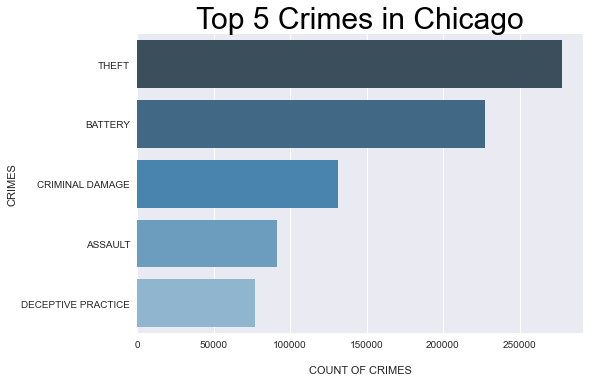

In [19]:
plt.style.use('seaborn')
temp = df.groupby('Primary Type', as_index=False).agg({"ID":'count'})
temp = temp.sort_values(by=['ID'], ascending=False).head()
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES")
plt.ylabel("CRIMES")
plt.show()

PROBABILITY OF AN ARREST

In [20]:
l=df["Arrest"].value_counts()
false=l[0]
true=l[1]
arrest=pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Probability of an arrest of a reported crime :",true/(false+true))

Probability of an arrest of a reported crime : 0.19854971766459342


DISTRIBUTION OF ARRESTS OVER EACH MONTH

In [21]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date
df['Date'] = df['Date'].apply(time_convert)

In [22]:
print(df['Date'])

0         2016-08-20 18:00:00
1         2016-05-03 14:30:00
2         2016-04-18 23:00:00
10        2016-03-07 21:39:00
11        2016-06-19 10:00:00
                  ...        
1206823   2020-01-01 02:45:00
1206824   2020-01-01 21:23:00
1206825   2020-01-01 17:00:00
1206826   2020-01-01 13:00:00
1206827   2020-01-01 00:15:00
Name: Date, Length: 1190251, dtype: datetime64[ns]


In [23]:
#Creating new Month column
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

In [24]:
print(df['Month'])

0           August
1              May
2            April
10           March
11            June
            ...   
1206823    January
1206824    January
1206825    January
1206826    January
1206827    January
Name: Month, Length: 1190251, dtype: object


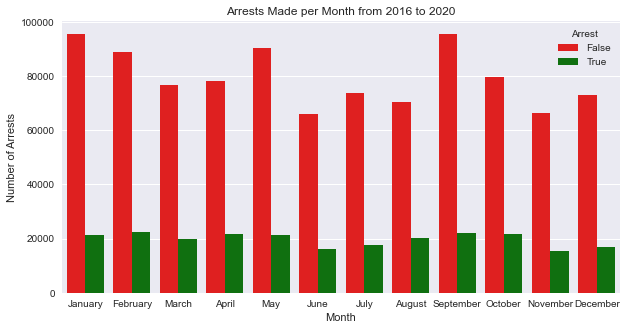

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",hue='Arrest',data=df[['Month','Arrest']],palette=['Red', 'Green'])
months = ['January','February','March','April','May','June','July','August','September','October','November','December']    
ax.set(xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month from 2016 to 2020')
plt.show()


DISTRIBUTION OF ARRESTS MADE WITH REFERENCE TO TYPE OF CRIMES

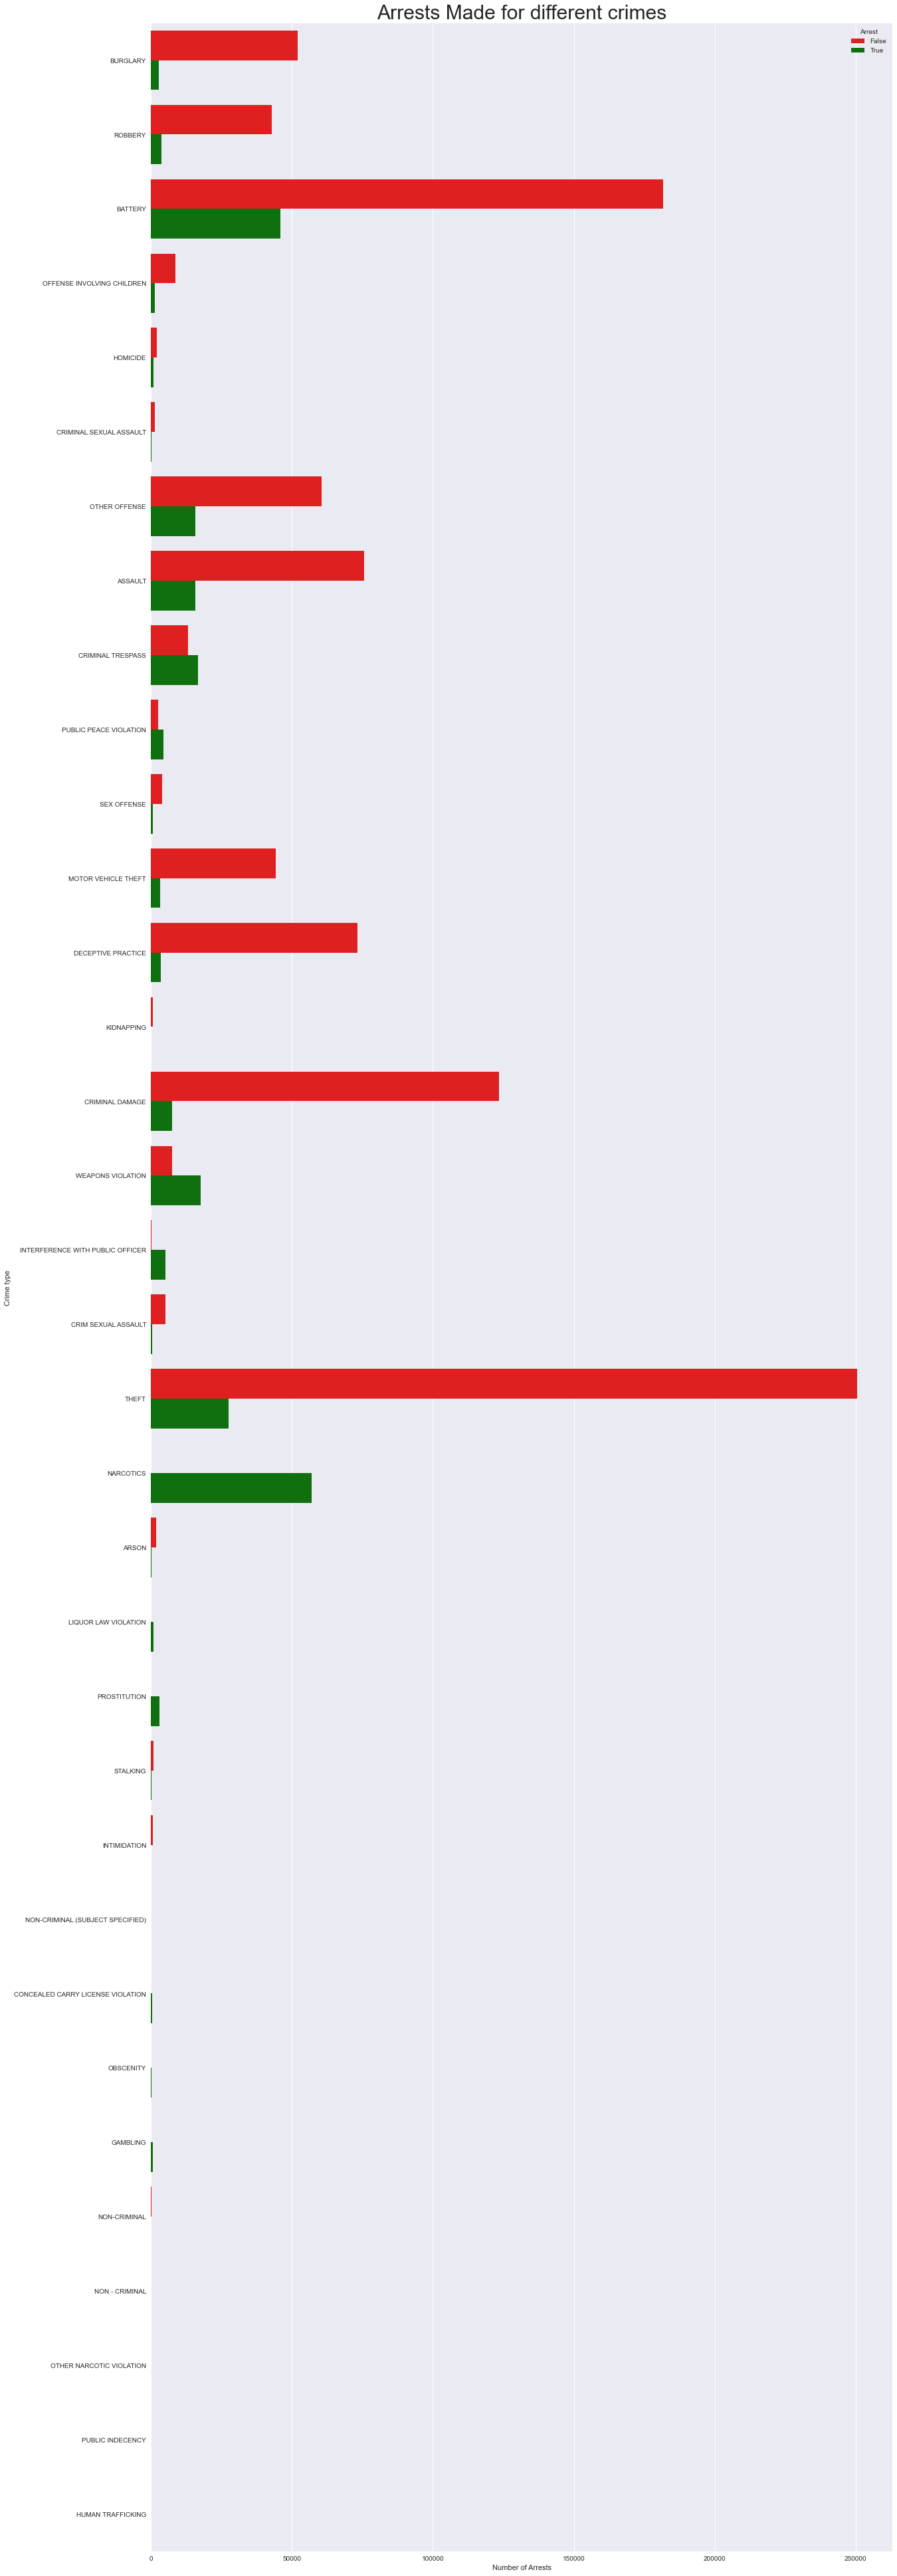

In [26]:
fig, ax = plt.subplots(figsize=(20,70))
ax = sns.countplot(y='Primary Type',hue='Arrest',data=df[['Primary Type','Arrest']],orient="h",palette=['Red', 'Green'])
months =df['Primary Type'].unique()    
ax.set(xlabel='Number of Arrests', ylabel='Crime type')
plt.title('Arrests Made for different crimes',fontsize=30)
plt.show()

HOW DOES CRIME VARY ACCORDING TO YEAR?

In [27]:
#Creating new Year column
def year(x):
    return x.strftime("%Y")
df['Year'] = df['Date'].apply(year)
print(df['Year'])

0          2016
1          2016
2          2016
10         2016
11         2016
           ... 
1206823    2020
1206824    2020
1206825    2020
1206826    2020
1206827    2020
Name: Year, Length: 1190251, dtype: object


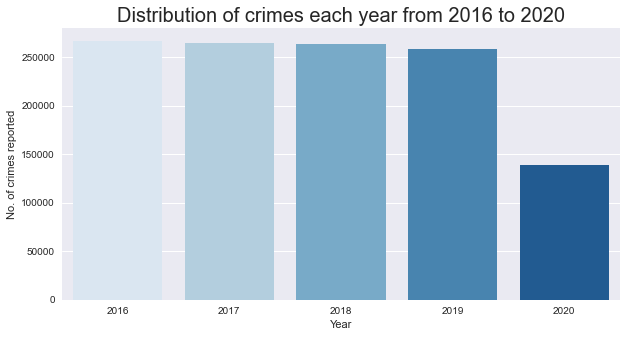

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='Year',data=df,palette="Blues")
years =df['Year'].unique()    
ax.set(xlabel='Year', ylabel='No. of crimes reported')
plt.title('Distribution of crimes each year from 2016 to 2020',fontsize=20)
plt.show()

WHICH HOURS ARE THE MOST UNSAFE?


In [29]:
#Creating new Hour column
def hour(x):
    return x.strftime("%H")
df['Hour'] = df['Date'].apply(hour)
print(df['Hour'])

0          18
1          14
2          23
10         21
11         10
           ..
1206823    02
1206824    21
1206825    17
1206826    13
1206827    00
Name: Hour, Length: 1190251, dtype: object


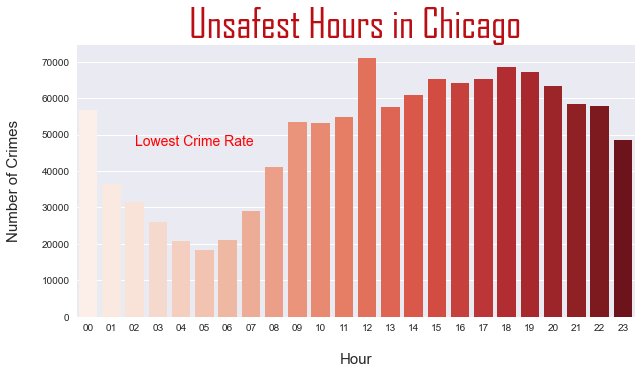

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette="Reds")
plt.title("Unsafest Hours in Chicago", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'})
plt.xlabel("\nHour", fontdict={'fontsize': 15})
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15})
plt.text(2, 47000, 'Lowest Crime Rate', fontdict={'fontsize': 14, 'color':"red" })
plt.show()

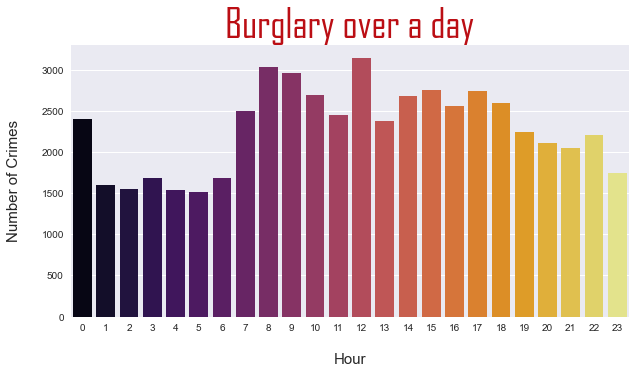

In [31]:
burglary_df = df[df['Primary Type']=='BURGLARY']
hours = [int(x) for x in list(burglary_df['Hour'].unique())]
hours = sorted(hours)
bur_cri = list(burglary_df['Hour'].value_counts().sort_index())
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=hours, y=bur_cri, palette='inferno')
plt.title("Burglary over a day", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'})
plt.xlabel("\nHour", fontdict={'fontsize': 15})
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15})

plt.show()

No,your house is not safe during morning. In fact, maximum burglary take place in morning itself.

24 HOUR PATTERN OF A CRIME

Enter the name of the crime of which 24 hour pattern is to be visualised  THEFT


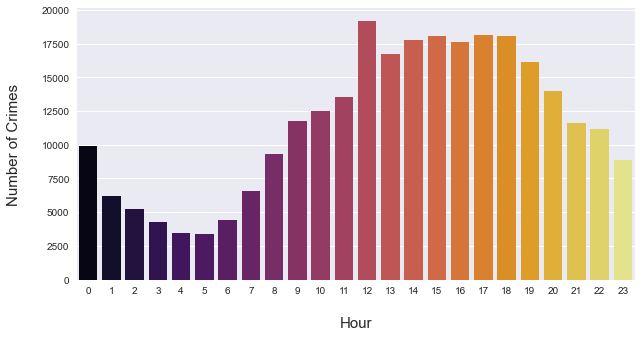

In [53]:
c=input("Enter the name of the crime of which 24 hour pattern is to be visualised  ")
crime_df = df[df['Primary Type']==c.upper()]
hours = [int(x) for x in list(crime_df['Hour'].unique())]
hours = sorted(hours)

h_cri = list(crime_df['Hour'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=h_cri, palette='inferno')
plt.xlabel("\nHour", fontdict={'fontsize': 15})
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15})
plt.show()

In [33]:
print(df['District'].unique())

[24. 15.  9.  3.  6.  7. 10. 11. 12. 25. 22.  5. 18.  8.  4. 19.  2. 17.
 16. 14. 20.  1. 31.]


WHICH DISTRICT IS THE SAFEST TO LIVE IN?

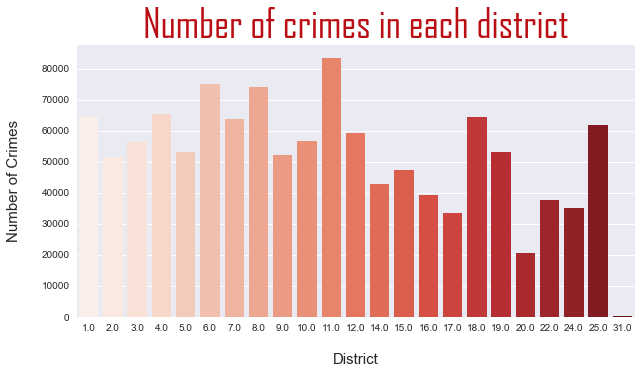

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='District', data=df, palette="Reds")
plt.title("Number of crimes in each district", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'})
plt.xlabel("\nDistrict", fontdict={'fontsize': 15})
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15})
plt.show()

VISUALISING TOP 5 CRIMES OF A DISTRICT

Enter the district you wish to see the 24 hour pattern off  6


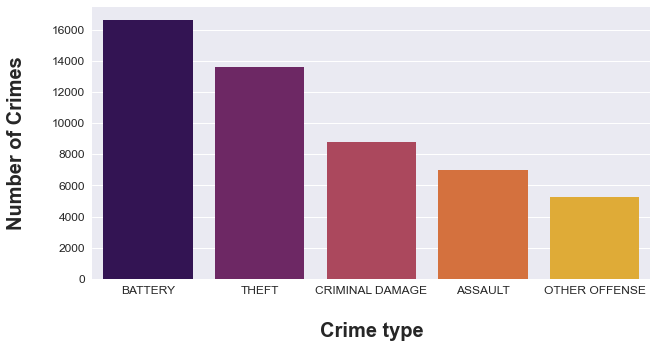

In [35]:
c = float(input("Enter the district you wish to see the 24 hour pattern off  "))
crime1_df = df[df['District']==c]
temp = crime1_df.groupby('Primary Type', as_index=False).agg({"ID":'count'})
temp = temp.sort_values(by=['ID'], ascending=False).head()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Primary Type',y='ID',data=temp, palette='inferno')
plt.xlabel("\nCrime type", fontdict={'fontsize': 20}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 20}, weight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

CONCENTRATION OF A CRIME IN THE CITY

Enter the crime you wish to see the concentration of in the city >> robbery


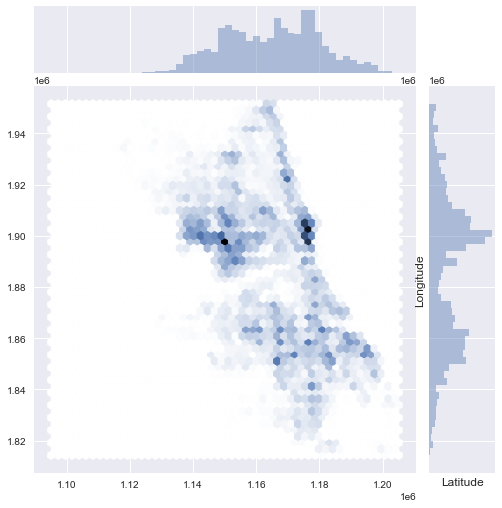

In [36]:
c = input("Enter the crime you wish to see the concentration of in the city >> ")
crime_df = df[df['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values,height=7,kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12})
plt.ylabel("Longitude", fontdict={'fontsize': 12})
plt.show()

# Prediction

In [39]:
df.index = pd.DatetimeIndex(df.Date)
chicago_prophet = df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2016-01-31,20402
1,2016-02-29,18553
2,2016-03-31,21834
3,2016-04-30,20916
4,2016-05-31,23308
5,2016-06-30,23756
6,2016-07-31,24563
7,2016-08-31,24623
8,2016-09-30,23417
9,2016-10-31,23472


In [40]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [41]:
chicago_prophet.head(), chicago_prophet.tail()

(        Date  Crime Count
 0 2016-01-31        20402
 1 2016-02-29        18553
 2 2016-03-31        21834
 3 2016-04-30        20916
 4 2016-05-31        23308,
          Date  Crime Count
 52 2020-05-31        17104
 53 2020-06-30        17131
 54 2020-07-31        18931
 55 2020-08-31        18844
 56 2020-09-30          978)

In [42]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [43]:
chicago_prophet_df.head()

,Date,Crime Count
0,2016-01-31,20402
1,2016-02-29,18553
2,2016-03-31,21834
3,2016-04-30,20916
4,2016-05-31,23308


In [45]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


FORECASTING INTO THE FUTURE

In [47]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [48]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,22918.265208,19053.222126,24396.511417,22918.265208,22918.265208,-1156.090939,-1156.090939,-1156.090939,-1156.090939,-1156.090939,-1156.090939,0.0,0.0,0.0,21762.174269
1,2016-02-29,22865.525848,17720.028609,23167.172787,22865.525848,22865.525848,-2371.983757,-2371.983757,-2371.983757,-2371.983757,-2371.983757,-2371.983757,0.0,0.0,0.0,20493.542091
2,2016-03-31,22809.149291,19175.826477,24193.586732,22809.149291,22809.149291,-1061.891030,-1061.891030,-1061.891030,-1061.891030,-1061.891030,-1061.891030,0.0,0.0,0.0,21747.258261
3,2016-04-30,22754.591333,17809.173228,23240.591633,22754.591333,22754.591333,-2334.996322,-2334.996322,-2334.996322,-2334.996322,-2334.996322,-2334.996322,0.0,0.0,0.0,20419.595011
4,2016-05-31,22698.214776,21393.146185,26362.400742,22698.214776,22698.214776,1366.869710,1366.869710,1366.869710,1366.869710,1366.869710,1366.869710,0.0,0.0,0.0,24065.084486


In [51]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
417,2021-09-26,12609.771049,38646.492534,43945.057115,12365.607135,12828.762097,28849.396606,28849.396606,28849.396606,28849.396606,28849.396606,28849.396606,0.0,0.0,0.0,41459.167655
418,2021-09-27,12600.441590,31624.617730,36777.608328,12355.116548,12820.443721,21560.306825,21560.306825,21560.306825,21560.306825,21560.306825,21560.306825,0.0,0.0,0.0,34160.748415
419,2021-09-28,12591.112131,23860.816106,29191.352559,12344.625961,12812.125345,13866.354100,13866.354100,13866.354100,13866.354100,13866.354100,13866.354100,0.0,0.0,0.0,26457.466231
420,2021-09-29,12581.782672,16060.804639,21184.714779,12334.111558,12803.806970,5881.725179,5881.725179,5881.725179,5881.725179,5881.725179,5881.725179,0.0,0.0,0.0,18463.507851
421,2021-09-30,12572.453213,7812.442559,12929.365655,12323.565394,12795.488594,-2273.411805,-2273.411805,-2273.411805,-2273.411805,-2273.411805,-2273.411805,0.0,0.0,0.0,10299.041408


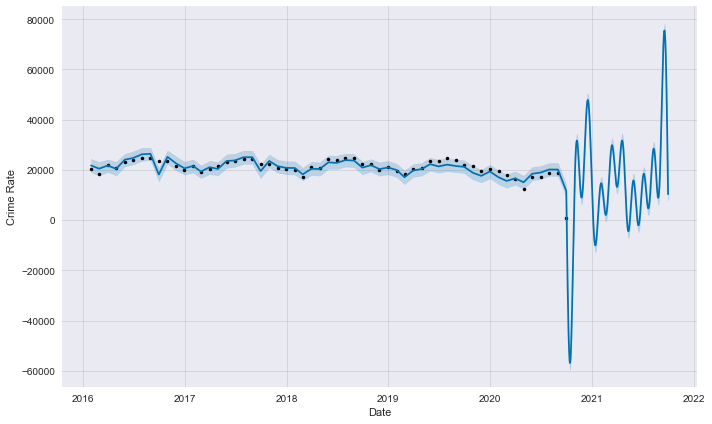

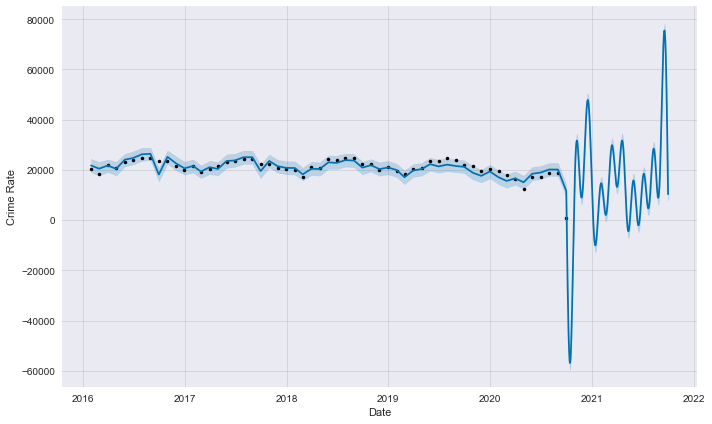

In [49]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

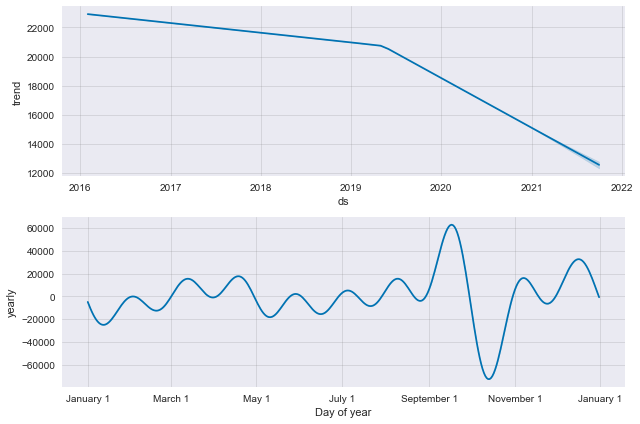

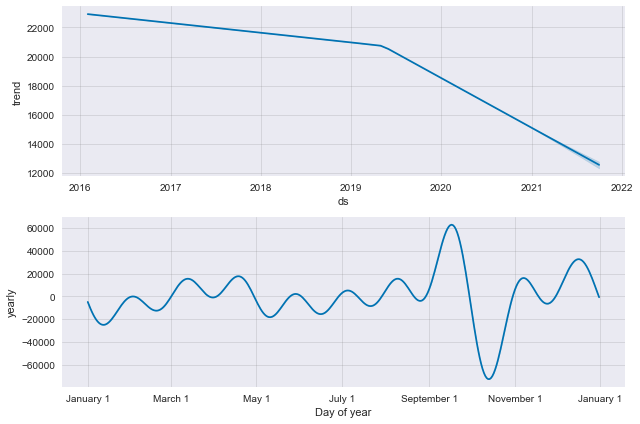

In [50]:
m.plot_components(forecast)